<a href="https://colab.research.google.com/github/thai94/d2l/blob/main/4.multilayer_perceptrons/4_1_multilayer_perceptrons_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import torch
import matplotlib.pyplot as plt

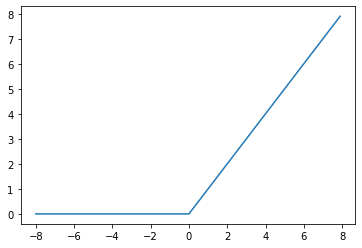

In [55]:
x = torch.arange(start=-8.0, end= 8.0, step = 0.1, requires_grad=True)
y = torch.relu(x)

plt.plot(x.detach(), y.detach())

In [56]:
y.backward(torch.ones_like(x))

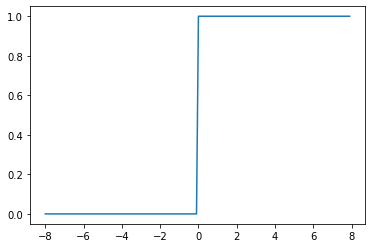

In [57]:
plt.plot(x.detach(), x.grad)

When input is negative, the derivative of the ReLu function is 0 and when the input is positive, the derivative is the ReLu is 1. <br>
=> That means what? <br>
Some information will either get throught or vanish <br>
Only the information's weights which get throught (value is > 0) will be updated.


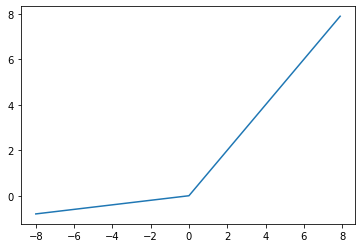

In [58]:
x.grad.zero_()
z = torch.prelu(x, weight=torch.tensor([0.1]))
plt.plot(x.detach(), z.detach())

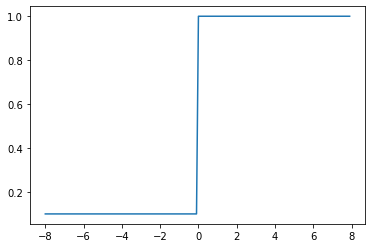

In [59]:
z.backward(torch.ones_like(x))
plt.plot(x.detach(), x.grad)

**Sigmoid Function**

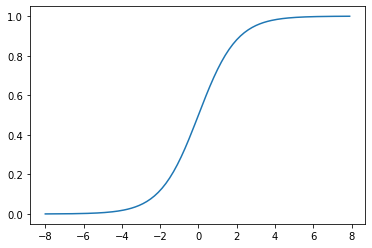

In [60]:
t = torch.sigmoid(x)
plt.plot(x.detach(), t.detach())

In [61]:
x.grad.data.zero_()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

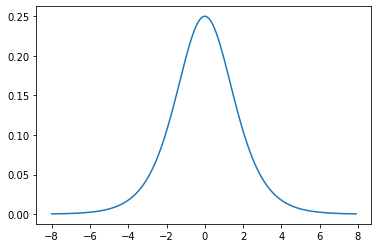

In [62]:
t.backward(torch.ones_like(x),retain_graph=True)
plt.plot(x.detach(), x.grad)

Comments: <br>
The sigmoid function is linear function <br>
How is the information flow? The bigger value of input the bigger portion you get. But hard to archive Zero or one, only get nearly that values. <br>
How are weights update? The value around zero value will be updated much

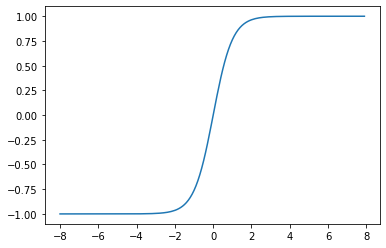

In [63]:
w = torch.tanh(x)
plt.plot(x.detach(), w.detach())

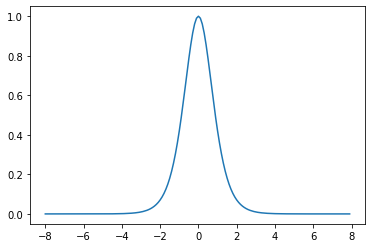

In [64]:
x.grad.data.zero_()
w.backward(torch.ones_like(x),retain_graph=True)
plt.plot(x.detach(), x.grad)